In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import openface

%matplotlib inline

<a href='https://openface-api.readthedocs.io/en/latest/index.html'>openface api</a>

(96, 96, 3)


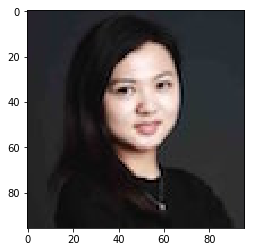

In [2]:
#prepare dataset
bgrimg=cv2.imread('tian.jpg')
rgbimg=cv2.cvtColor(bgrimg,cv2.COLOR_BGR2RGB)
print(rgbimg.shape)
plt.imshow(rgbimg)

68


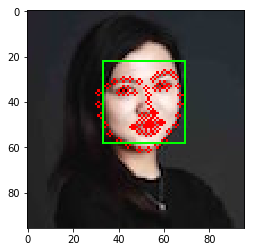

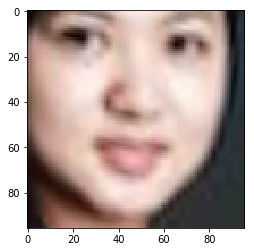

In [3]:
def drawLandMark(img):
    align=openface.AlignDlib('models/dlib/shape_predictor_68_face_landmarks.dat')
    box=align.getLargestFaceBoundingBox(img)
    landmarks=align.findLandmarks(img,box)
    img=img.copy()
    for mark in landmarks:
        cv2.circle(img,mark,1,(255,0,0),1)
    cv2.rectangle(img,(box.left(),box.top()),(box.right(),box.bottom()),(0,255,0))
    plt.figure(facecolor='w')
    plt.imshow(img)
    print(len(landmarks))
#detect face,and landmark
drawLandMark(rgbimg)
#using a align to find face,and draw it
align=openface.AlignDlib('models/dlib/shape_predictor_68_face_landmarks.dat')
box=align.getLargestFaceBoundingBox(rgbimg)
align_img=align.align(96,rgbimg,box,landmarkIndices=align.INNER_EYES_AND_BOTTOM_LIP)
plt.figure()
plt.imshow(align_img)

In [6]:
#define a net
net=openface.TorchNeuralNet('/home/zhangxk/AIProject/openface/models/openface/nn4.small2.v1.t7',imgDim=96)

In [ ]:
pwd